In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn

import argparse
import importlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from datetime import datetime
import datetime as dt
import time

import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage

import csv

# from 

import config
# import source.tools.load_dataset_test as load_dataset_test
import load_dataset as load_dataset_test

training_samples, valid_samples = load_dataset_test.train_test_split(
    str(config.ANNOTATION_DATA),
    config.TEST_SPLIT,
)

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training sample instances: 856
Validation sample instances: 17


In [2]:
train_numpy_dataset = load_dataset_test.AugmentFaceKeypointDataset(
    training_samples, f"{config.DATASET_PATH}/images", 0
)

len(data_set_list) 856


[ 6.5551834 65.70911  ]


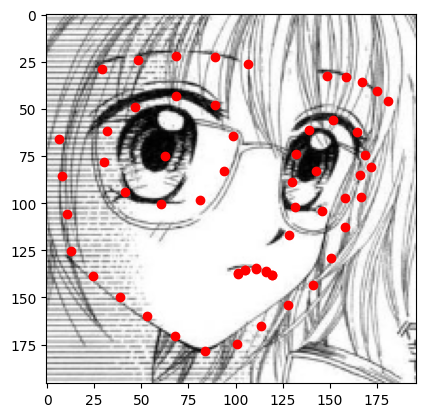

In [3]:
image = train_numpy_dataset[0][0]
keypoints = train_numpy_dataset[0][1:]
keypoints = np.array(keypoints, dtype="float32")
keypoints = config.RESIZE * keypoints[0]
print(keypoints[0])
plt.imshow(image)
plt.scatter(keypoints[:,0], keypoints[:,1], color='r')
plt.show()

In [4]:
x_sizes = []
y_sizes = []
for i in train_numpy_dataset:
    x, y , _ = i[0].shape
    x_sizes.append(x)
    y_sizes.append(y)
    # print(x_sizes)
    # print(y_sizes)
    # print(i[0].shape)
print("x_ave",sum(x_sizes) / (len(x_sizes) + 1))
print("y_ave",sum(y_sizes) / (len(y_sizes) + 1))

x_ave 195.77129521586932
y_ave 195.77129521586932


landmark_num 59
kps KeypointsOnImage([Keypoint(x=54.23635864, y=63.71196747), Keypoint(x=55.08430862, y=78.34134674), Keypoint(x=56.21492004, y=93.23196411), Keypoint(x=58.47613525, y=107.86134338), Keypoint(x=61.30265808, y=122.22949219), Keypoint(x=65.25978088, y=136.07514954), Keypoint(x=68.93425751, y=150.18205261), Keypoint(x=79.10973358, y=156.97427368), Keypoint(x=94.65558624, y=155.92932129), Keypoint(x=109.07083893, y=151.48825073), Keypoint(x=124.05139923, y=147.56965637), Keypoint(x=136.77073669, y=141.03869629), Keypoint(x=147.79415894, y=131.11161804), Keypoint(x=152.88189697, y=117.52719116), Keypoint(x=154.57780457, y=102.37533569), Keypoint(x=154.01251221, y=87.22347260), Keypoint(x=152.31658936, y=74.68400574), Keypoint(x=106.80963135, y=65.80187988), Keypoint(x=62.15061188, y=61.62205887), Keypoint(x=96.35150146, y=61.36081314), Keypoint(x=102.28718567, y=60.31586075), Keypoint(x=108.78819275, y=61.09957504), Keypoint(x=114.44123077, y=63.45072937), Keypoint(x=119.246

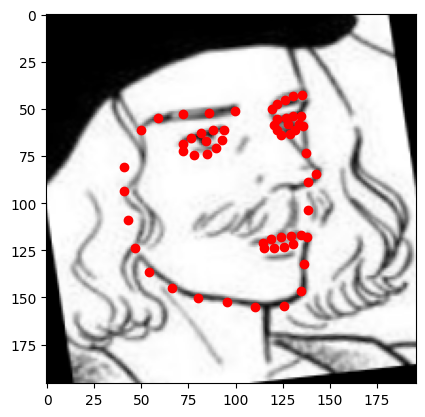

In [120]:
image = train_numpy_dataset[100][0]
keypoints = train_numpy_dataset[100][1:]
keypoints = np.array(keypoints, dtype="float32")
keypoints = config.RESIZE * keypoints[0]

landmark_num = len(keypoints) - 1
print("landmark_num",landmark_num)
kps = KeypointsOnImage(
    [Keypoint(x=keypoints[i][0], y=keypoints[i][1]) for i in range(0,landmark_num)],
    shape=image.shape,
)

print("kps",kps)

# About Augment setting
seq = iaa.Sequential(
    [
        iaa.Affine(
            rotate=(-80, 80),# 右、左回りに80度回転させる
            # scale={"x": (0.5, 1.2), "y": (0.5, 1.2)},# x軸y軸それぞれずらす
            # translate_percent={"x": -0.20}
            # shear=(-16, 16)
        ),
        iaa.Fliplr(0.5), # 50%の確率で画像を反転させる
        iaa.ShearX((-10, 10))
    ]
)

# for aug_count in range(aug_data_num):
print("データ拡張を行います")
image_aug, kps_aug = seq(image=image, keypoints=kps)
print("kps_aug",kps_aug)
keypoints = []
for i in range(len(kps.keypoints)):
    before = kps.keypoints[i]
    after = kps_aug.keypoints[i]
    keypoints.append([after.x, after.y])
    # print(after.x)
keypoints = np.array(keypoints, dtype="float32")
# print(keypoints)
# print(keypoints)

image_after = kps_aug.draw_on_image(image_aug, size=0)

plt.imshow(image_after)
plt.scatter(keypoints[:,0], keypoints[:,1], color='r')
plt.show()

# データ拡張を行った画像をリストに格納する
# data_set_list.append([image_after, keypoints])